Latest update 2018-11-14 11:16 PM CET

## Introduction

This document has the purpose of giving the reader a fast overview of the current market situation. Focus is mainly on the Swedish and US markets.

Please do not hesitate to contact me at lundberg.oscar@gmail.com

In [1]:
# Import libraries
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.1)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams.update({'font.size': 14})

# Helper functions to load data
from lib.load_index_trace import load_index_trace
from lib.get_avanza_fundamentals import get_avanza_fundamentals
from lib.load_stocks_fundamentals import load_stocks_fundamentals
from lib.load_stocks_trace import load_stocks_trace

# 1 Index

In this section the trace for the OMXS30 is presented.

[*********************100%***********************]  1 of 1 downloaded


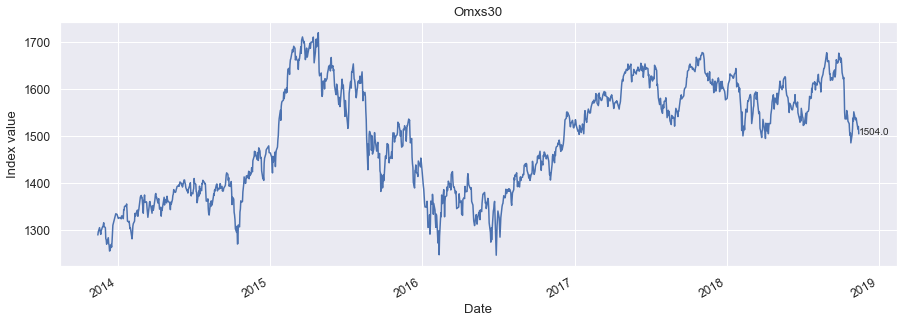

In [2]:
# Load index trace
df = load_index_trace(time_years=5);
plt.figure(figsize=(15, 5))
df.plot(title='Omxs30');
plt.ylabel('Index value');
plt.text(mdates.date2num(df.iloc[-1:].index[0]), round(df.iloc[-1:][0]), str(round(df.iloc[-1:][0])));

# 2 Fundamentals

This section presents some of the fundamental key-values for different stocks. Dividend yield, pe-reatios etc.

In [ ]:
df = load_stocks_fundamentals()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [ ]:
df.columns

### 2.1 Dividend yield

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['dividend_yield'], ascending=False)
ax = sns.barplot(x='kortnamn', y='dividend_yield', data=df, palette="Blues_d");
plt.plot([0, len(df)-1], [0.040, 0.040], linewidth=2);
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
        
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

### 2.2 P/E ratio

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['pe_ratio'], ascending=False)
ax = sns.barplot(x='kortnamn', y='pe_ratio', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

### 2.3 Dividends/Earnings

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['dividend/earnings'], ascending=False)
ax = sns.barplot(x='kortnamn', y='dividend/earnings', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

### 2.4 Net current assets per share

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['ncavps'], ascending=False)
ax = sns.barplot(x='kortnamn', y='ncavps', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

### 2.5 Net cash per share

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['net_cash_ps'], ascending=False)
ax = sns.barplot(x='kortnamn', y='net_cash_ps', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

### 2.6 Price/book 

In [ ]:
plt.figure(figsize=(15, 4))
df = df.sort_values(by=['price_book'], ascending=False)
ax = sns.barplot(x='kortnamn', y='price_book', data=df, palette="Blues_d");
plt.xlabel('Stock');
for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', rotation=0, xytext=(0, 8), textcoords='offset points')
for ax in ax.get_xticklabels():
    ax.set_rotation(30)
    ax.set_ha("right")

# 3 Appendix

In this appendix, the price for various stocks are presented.

In [ ]:
df = load_stocks_trace(time_years=5);

In [ ]:
import math
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(len(df.columns), sharex=False, figsize=(18, 120))
log = False
import numpy as np  
for idx, stock in enumerate(df): 
    df[stock].plot(ax=ax[idx], logy=log)
    ax[idx].set_title(stock)
    x = df[stock].iloc[-1:].index[0]
    y = round(df[stock].iloc[-1:][0] ,2)
    print(x, math.isnan(y), stock)
    if math.isnan(y) == False:
        ax[idx].text(x, y , str(round(df[stock].iloc[-1:][0], 2)))

fig.subplots_adjust(hspace=0.3)
plt.show()
